# Part 2

**1. remove the dataset files from github:** 
removed

**2. title and label box and whiskers graphs:**
titles and labeled

**3. when transforming with minmaxscalar, only fit once, with all X data, and then transform individual parts:**
used the minmaxscalar and called fit on all of the X data once, then transformed each part individually

**4. log scale mean average error in your error vs epoch graph:**
adjusted to logscale the y-axis for both MAE v epoch graphs in 5.2 model training

**5. include a numeric accuracy metric for the model:**
Added MAE accuracy

# Part 3

### 3.1 Dataset Description

The dataset that is going to be used for this project features stock market information for four companies, Apple, Microsoft, Netflix and Google. It features a three month data range where every open market day has the companies open, close, high, low, and adjusted close stock price for the period. It also features the volume of trades for that day(how many shares are traded). This is public data which can be found by exploring pretty much any finance site as all of these numbers are public knowledge and checked across multiple platforms. This dataset was last updated in May and therefore features data from February 7th to May 5th of 2023. Given this dataset the plan is to determine the expected adjusted close stock price for one company Google. We will create a model to determine this value given the opening price, highs, lows, and volume traded for both Google and also the other three companies as their is expected to be correlation due to being in the same industry. It would be more beneficial to have a wider range of dates for this model, however this range should be enough to create a valid model to determine expected stock closing price.

# Part 4

### 4.1 Data cleaning

In [1]:
import pandas as pd

In [2]:
from zipfile import ZipFile

In [3]:
with ZipFile('stock_market_performance.zip', 'r') as zObject:
    zObject.extractall()

In [4]:
data_df = pd.read_csv("stocks.csv")

In [5]:
data_df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
...,...,...,...,...,...,...,...,...
243,GOOG,2023-05-01,107.720001,108.680000,107.500000,107.709999,107.709999,20926300
244,GOOG,2023-05-02,107.660004,107.730003,104.500000,105.980003,105.980003,20343100
245,GOOG,2023-05-03,106.220001,108.129997,105.620003,106.120003,106.120003,17116300
246,GOOG,2023-05-04,106.160004,106.300003,104.699997,105.209999,105.209999,19780600


In [6]:
data_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,215.252093,217.919662,212.697452,215.381674,215.362697,3.208210e+07
std,91.691315,92.863023,90.147881,91.461989,91.454750,2.233590e+07
min,89.540001,90.129997,88.860001,89.349998,89.349998,2.657900e+06
25%,135.235004,137.440004,134.822495,136.347498,136.347498,1.714180e+07
50%,208.764999,212.614998,208.184998,209.920006,209.920006,2.734000e+07
75%,304.177505,307.565002,295.437500,303.942505,303.942505,4.771772e+07
max,372.410004,373.829987,361.739990,366.829987,366.829987,1.133164e+08


In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB


In [8]:
data_df['Ticker'].isnull().sum()

0

In [9]:
data_df['Date'].isnull().sum()

0

In [10]:
data_df['Open'].isnull().sum()

0

In [11]:
data_df['Close'].isnull().sum()

0

In [12]:
data_df['High'].isnull().sum()

0

In [13]:
data_df['Low'].isnull().sum()

0

In [14]:
data_df['Adj Close'].isnull().sum()

0

In [15]:
data_df['Volume'].isnull().sum()

0

There are no null values, and it seems as if the datatypes are all as expected

### 4.2 Outlier Detection

In [16]:
from scipy import stats

In [17]:
import numpy as np

In [18]:
apple_df = data_df[data_df['Ticker']=='AAPL'].copy()
apple_df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
...,...,...,...,...,...,...,...,...
57,AAPL,2023-05-01,169.279999,170.449997,168.639999,169.589996,169.589996,52472900
58,AAPL,2023-05-02,170.089996,170.350006,167.539993,168.539993,168.539993,48425700
59,AAPL,2023-05-03,169.500000,170.919998,167.160004,167.449997,167.449997,65136000
60,AAPL,2023-05-04,164.889999,167.039993,164.309998,165.789993,165.789993,81235400


In [19]:
data_df['Ticker'].unique()

array(['AAPL', 'MSFT', 'NFLX', 'GOOG'], dtype=object)

In [20]:
msft_df = data_df[data_df['Ticker']=='MSFT'].reset_index(drop=True).copy()
msft_df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,MSFT,2023-02-07,260.529999,268.769989,260.079987,267.559998,266.891510,50841400
1,MSFT,2023-02-08,273.200012,276.760010,266.209991,266.730011,266.063599,54686000
2,MSFT,2023-02-09,273.799988,273.980011,262.799988,263.619995,262.961365,42375100
3,MSFT,2023-02-10,261.529999,264.089996,260.660004,263.100006,262.442657,25818500
4,MSFT,2023-02-13,267.640015,274.600006,267.149994,271.320007,270.642120,44630900
...,...,...,...,...,...,...,...,...
57,MSFT,2023-05-01,306.970001,308.600006,305.149994,305.559998,305.559998,21294100
58,MSFT,2023-05-02,307.760010,309.179993,303.910004,305.410004,305.410004,26404400
59,MSFT,2023-05-03,306.619995,308.609985,304.089996,304.399994,304.399994,22360800
60,MSFT,2023-05-04,306.239990,307.760010,303.399994,305.410004,305.410004,22519900


In [21]:
nflx_df = data_df[data_df['Ticker']=='NFLX'].reset_index(drop=True).copy()
nflx_df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,NFLX,2023-02-07,358.510010,364.179993,354.179993,362.950012,362.950012,6289400
1,NFLX,2023-02-08,360.019989,368.190002,358.309998,366.829987,366.829987,6253200
2,NFLX,2023-02-09,372.410004,373.829987,361.739990,362.500000,362.500000,6901100
3,NFLX,2023-02-10,359.160004,362.140015,347.140015,347.359985,347.359985,7291100
4,NFLX,2023-02-13,349.500000,359.700012,344.250000,358.570007,358.570007,7134400
...,...,...,...,...,...,...,...,...
57,NFLX,2023-05-01,329.440002,331.230011,318.089996,324.119995,324.119995,5341500
58,NFLX,2023-05-02,325.000000,326.070007,315.619995,317.549988,317.549988,4318600
59,NFLX,2023-05-03,317.549988,324.619995,315.850006,319.299988,319.299988,5064100
60,NFLX,2023-05-04,319.010010,323.609985,317.950012,320.779999,320.779999,3879700


In [22]:
goog_df = data_df[data_df['Ticker']=='GOOG'].reset_index(drop=True).copy()
goog_df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,GOOG,2023-02-07,103.629997,108.669998,103.547997,108.040001,108.040001,33738800
1,GOOG,2023-02-08,102.690002,103.580002,98.455002,100.000000,100.000000,73546000
2,GOOG,2023-02-09,100.540001,100.610001,93.860001,95.459999,95.459999,97798600
3,GOOG,2023-02-10,95.739998,97.019997,94.529999,94.860001,94.860001,49325300
4,GOOG,2023-02-13,95.010002,95.349998,94.050003,95.000000,95.000000,43116600
...,...,...,...,...,...,...,...,...
57,GOOG,2023-05-01,107.720001,108.680000,107.500000,107.709999,107.709999,20926300
58,GOOG,2023-05-02,107.660004,107.730003,104.500000,105.980003,105.980003,20343100
59,GOOG,2023-05-03,106.220001,108.129997,105.620003,106.120003,106.120003,17116300
60,GOOG,2023-05-04,106.160004,106.300003,104.699997,105.209999,105.209999,19780600


In [23]:
import seaborn as sns

In [24]:
import matplotlib.pyplot as plt

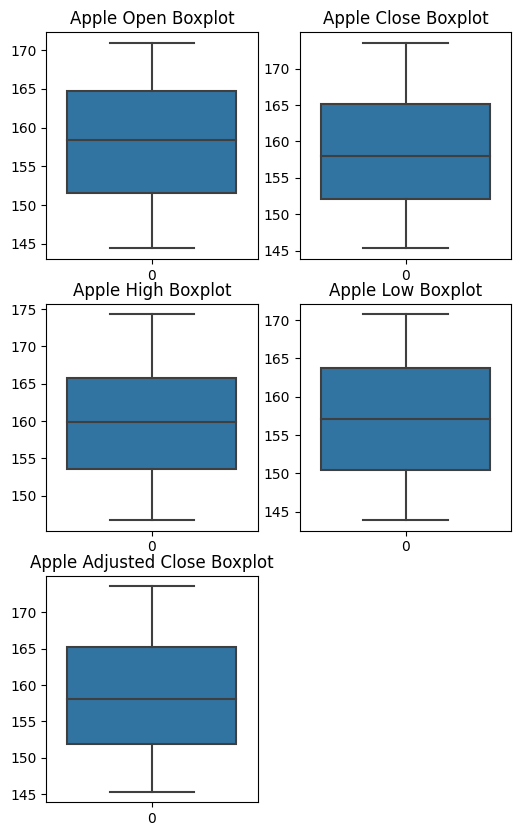

In [25]:
fig, ax = plt.subplots(3, 2, figsize=(6, 10))
axs = ax.ravel()
sns.boxplot(apple_df['Open'], ax = axs[0])
axs[0].set_title('Apple Open Boxplot')
sns.boxplot(apple_df['Close'], ax = axs[1])
axs[1].set_title('Apple Close Boxplot')
sns.boxplot(apple_df['High'], ax = axs[2])
axs[2].set_title('Apple High Boxplot')
sns.boxplot(apple_df['Low'], ax = axs[3])
axs[3].set_title('Apple Low Boxplot')
sns.boxplot(apple_df['Adj Close'], ax = axs[4])
axs[4].set_title('Apple Adjusted Close Boxplot')
fig.delaxes(axs[5])
plt.show()

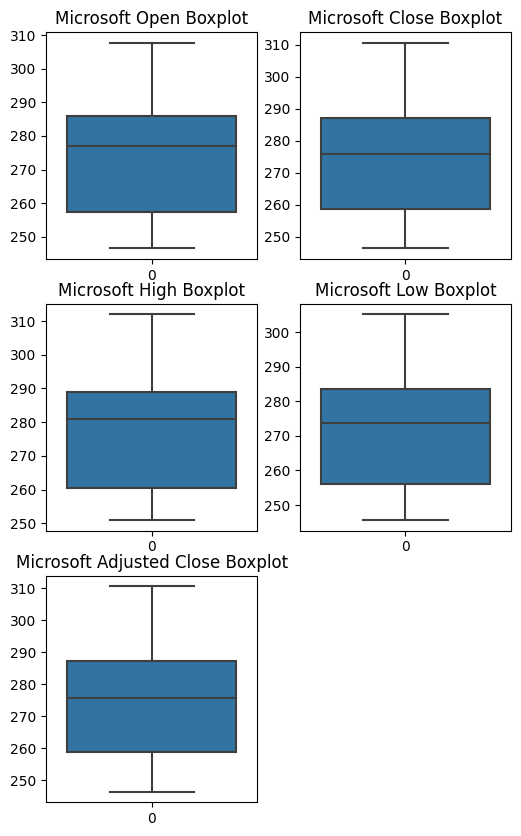

In [26]:
fig, ax = plt.subplots(3, 2, figsize=(6, 10))
axs = ax.ravel()
sns.boxplot(msft_df['Open'], ax = axs[0])
axs[0].set_title('Microsoft Open Boxplot')
sns.boxplot(msft_df['Close'], ax = axs[1])
axs[1].set_title('Microsoft Close Boxplot')
sns.boxplot(msft_df['High'], ax = axs[2])
axs[2].set_title('Microsoft High Boxplot')
sns.boxplot(msft_df['Low'], ax = axs[3])
axs[3].set_title('Microsoft Low Boxplot')
sns.boxplot(msft_df['Adj Close'], ax = axs[4])
axs[4].set_title('Microsoft Adjusted Close Boxplot')
fig.delaxes(axs[5])
plt.show()

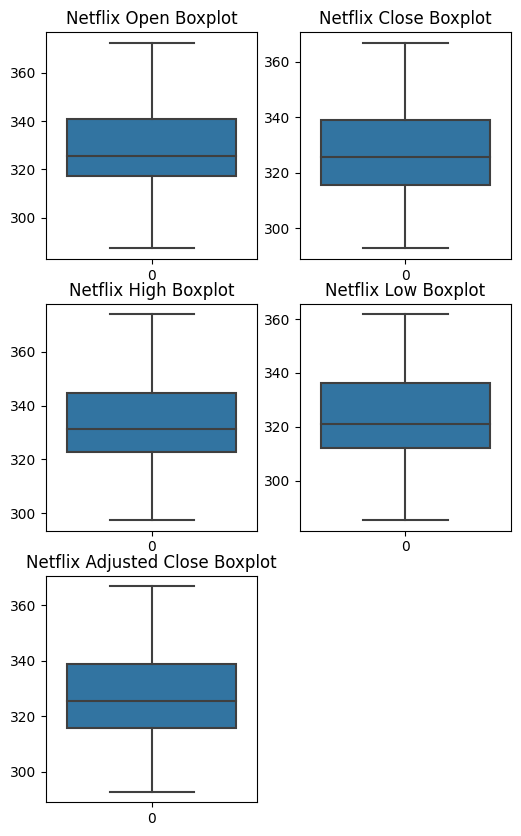

In [27]:
fig, ax = plt.subplots(3, 2, figsize=(6, 10))
axs = ax.ravel()
sns.boxplot(nflx_df['Open'], ax = axs[0])
axs[0].set_title('Netflix Open Boxplot')
sns.boxplot(nflx_df['Close'], ax = axs[1])
axs[1].set_title('Netflix Close Boxplot')
sns.boxplot(nflx_df['High'], ax = axs[2])
axs[2].set_title('Netflix High Boxplot')
sns.boxplot(nflx_df['Low'], ax = axs[3])
axs[3].set_title('Netflix Low Boxplot')
sns.boxplot(nflx_df['Adj Close'], ax = axs[4])
axs[4].set_title('Netflix Adjusted Close Boxplot')
fig.delaxes(axs[5])
plt.show()

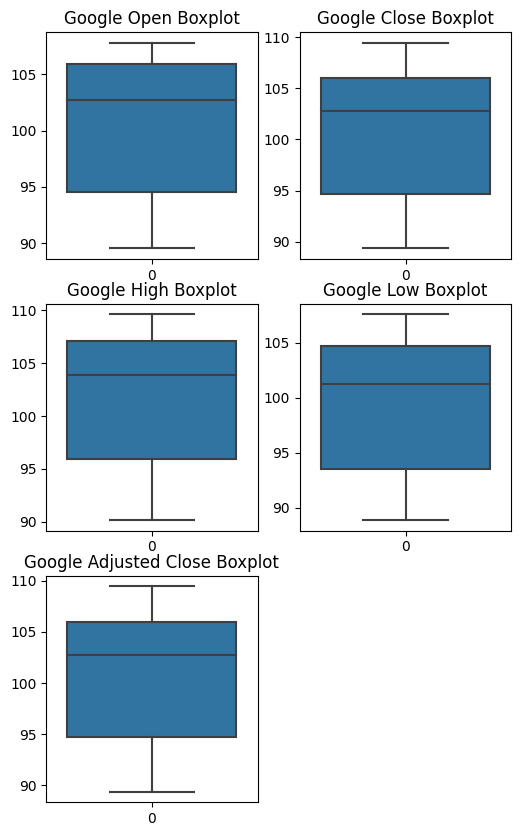

In [28]:
fig, ax = plt.subplots(3, 2, figsize=(6, 10))
axs = ax.ravel()
sns.boxplot(goog_df['Open'], ax = axs[0])
axs[0].set_title('Google Open Boxplot')
sns.boxplot(goog_df['Close'], ax = axs[1])
axs[1].set_title('Google Close Boxplot')
sns.boxplot(goog_df['High'], ax = axs[2])
axs[2].set_title('Google High Boxplot')
sns.boxplot(goog_df['Low'], ax = axs[3])
axs[3].set_title('Google Low Boxplot')
sns.boxplot(goog_df['Adj Close'], ax = axs[4])
axs[4].set_title('Google Adjusted Close Boxplot')
fig.delaxes(axs[5])
plt.show()

Given the above boxplots we have determined there are no outliers which must be removed for an accurate model

### 4.3 Data Quality and Consistency

In [29]:
msft_df['Date'].nunique()

62

In [30]:
apple_df['Date'].nunique()

62

In [31]:
nflx_df['Date'].nunique()

62

In [32]:
goog_df['Date'].nunique()

62

In [33]:
data_df['Date'].nunique()

62

In [34]:
data_df[data_df['Open']<0]

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume


In [35]:
data_df[data_df['Close']<0]

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume


In [36]:
data_df[data_df['High']<0]

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume


In [37]:
data_df[data_df['Low']<0]

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume


In [38]:
data_df[data_df['Adj Close']<0]

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume


In [39]:
data_df[data_df['Volume']<0]

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume


### 3.4 Model Prep

In [40]:
features = ['Open', 'High', 'Low', 'Volume', 'AAPL Open', 'AAPL High', 'AAPL Low', 'AAPL Adj Close', 'AAPL Volume', \
            'MSFT Open', 'MSFT High', 'MSFT Low', 'MSFT Adj Close', 'MSFT Volume', \
           'NFLX Open', 'NFLX High', 'NFLX Low', 'NFLX Adj Close', 'NFLX Volume']
output = pd.DataFrame(data_df['Adj Close'])

In [41]:
apple_df.drop(['Ticker', 'Close', 'Date'], axis=1, inplace = True)
apple_df.rename({'Open':'AAPL Open', 'High':'AAPL High', 'Low':'AAPL Low', 'Adj Close':'AAPL Adj Close', 'Volume':'AAPL Volume'}, axis=1, inplace=True)
apple_df

,AAPL Open,AAPL High,AAPL Low,AAPL Adj Close,AAPL Volume
0,150.639999,155.229996,150.639999,154.414230,83322600
1,153.880005,154.580002,151.169998,151.688400,64120100
2,153.779999,154.330002,150.419998,150.639999,56007100
3,149.460007,151.339996,149.220001,151.009995,57450700
4,150.949997,154.259995,150.919998,153.850006,62199000
...,...,...,...,...,...
57,169.279999,170.449997,168.639999,169.589996,52472900
58,170.089996,170.350006,167.539993,168.539993,48425700
59,169.500000,170.919998,167.160004,167.449997,65136000
60,164.889999,167.039993,164.309998,165.789993,81235400


In [42]:
nflx_df.drop(['Ticker', 'Close', 'Date'], axis=1, inplace = True)
nflx_df.rename({'Open':'NFLX Open', 'High':'NFLX High', 'Low':'NFLX Low', 'Adj Close':'NFLX Adj Close', 'Volume':'NFLX Volume'}, axis=1, inplace=True)
nflx_df

,NFLX Open,NFLX High,NFLX Low,NFLX Adj Close,NFLX Volume
0,358.510010,364.179993,354.179993,362.950012,6289400
1,360.019989,368.190002,358.309998,366.829987,6253200
2,372.410004,373.829987,361.739990,362.500000,6901100
3,359.160004,362.140015,347.140015,347.359985,7291100
4,349.500000,359.700012,344.250000,358.570007,7134400
...,...,...,...,...,...
57,329.440002,331.230011,318.089996,324.119995,5341500
58,325.000000,326.070007,315.619995,317.549988,4318600
59,317.549988,324.619995,315.850006,319.299988,5064100
60,319.010010,323.609985,317.950012,320.779999,3879700


In [43]:
msft_df.drop(['Ticker', 'Close', 'Date'], axis=1, inplace = True)
msft_df.rename({'Open':'MSFT Open', 'High':'MSFT High', 'Low':'MSFT Low', 'Adj Close':'MSFT Adj Close', 'Volume':'MSFT Volume'}, axis=1, inplace=True)
msft_df

,MSFT Open,MSFT High,MSFT Low,MSFT Adj Close,MSFT Volume
0,260.529999,268.769989,260.079987,266.891510,50841400
1,273.200012,276.760010,266.209991,266.063599,54686000
2,273.799988,273.980011,262.799988,262.961365,42375100
3,261.529999,264.089996,260.660004,262.442657,25818500
4,267.640015,274.600006,267.149994,270.642120,44630900
...,...,...,...,...,...
57,306.970001,308.600006,305.149994,305.559998,21294100
58,307.760010,309.179993,303.910004,305.410004,26404400
59,306.619995,308.609985,304.089996,304.399994,22360800
60,306.239990,307.760010,303.399994,305.410004,22519900


In [44]:
comb_df = pd.concat([goog_df, apple_df, nflx_df, msft_df], axis=1)
comb_df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,AAPL Open,AAPL High,...,NFLX Open,NFLX High,NFLX Low,NFLX Adj Close,NFLX Volume,MSFT Open,MSFT High,MSFT Low,MSFT Adj Close,MSFT Volume
0,GOOG,2023-02-07,103.629997,108.669998,103.547997,108.040001,108.040001,33738800,150.639999,155.229996,...,358.510010,364.179993,354.179993,362.950012,6289400,260.529999,268.769989,260.079987,266.891510,50841400
1,GOOG,2023-02-08,102.690002,103.580002,98.455002,100.000000,100.000000,73546000,153.880005,154.580002,...,360.019989,368.190002,358.309998,366.829987,6253200,273.200012,276.760010,266.209991,266.063599,54686000
2,GOOG,2023-02-09,100.540001,100.610001,93.860001,95.459999,95.459999,97798600,153.779999,154.330002,...,372.410004,373.829987,361.739990,362.500000,6901100,273.799988,273.980011,262.799988,262.961365,42375100
3,GOOG,2023-02-10,95.739998,97.019997,94.529999,94.860001,94.860001,49325300,149.460007,151.339996,...,359.160004,362.140015,347.140015,347.359985,7291100,261.529999,264.089996,260.660004,262.442657,25818500
4,GOOG,2023-02-13,95.010002,95.349998,94.050003,95.000000,95.000000,43116600,150.949997,154.259995,...,349.500000,359.700012,344.250000,358.570007,7134400,267.640015,274.600006,267.149994,270.642120,44630900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,GOOG,2023-05-01,107.720001,108.680000,107.500000,107.709999,107.709999,20926300,169.279999,170.449997,...,329.440002,331.230011,318.089996,324.119995,5341500,306.970001,308.600006,305.149994,305.559998,21294100
58,GOOG,2023-05-02,107.660004,107.730003,104.500000,105.980003,105.980003,20343100,170.089996,170.350006,...,325.000000,326.070007,315.619995,317.549988,4318600,307.760010,309.179993,303.910004,305.410004,26404400
59,GOOG,2023-05-03,106.220001,108.129997,105.620003,106.120003,106.120003,17116300,169.500000,170.919998,...,317.549988,324.619995,315.850006,319.299988,5064100,306.619995,308.609985,304.089996,304.399994,22360800
60,GOOG,2023-05-04,106.160004,106.300003,104.699997,105.209999,105.209999,19780600,164.889999,167.039993,...,319.010010,323.609985,317.950012,320.779999,3879700,306.239990,307.760010,303.399994,305.410004,22519900


In [45]:
comb_df.isnull().sum()

Ticker            0
Date              0
Open              0
High              0
Low               0
Close             0
Adj Close         0
Volume            0
AAPL Open         0
AAPL High         0
AAPL Low          0
AAPL Adj Close    0
AAPL Volume       0
NFLX Open         0
NFLX High         0
NFLX Low          0
NFLX Adj Close    0
NFLX Volume       0
MSFT Open         0
MSFT High         0
MSFT Low          0
MSFT Adj Close    0
MSFT Volume       0
dtype: int64

In [46]:
model_df = comb_df.sample(frac=1).reset_index(drop=True).copy()
model_df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,AAPL Open,AAPL High,...,NFLX Open,NFLX High,NFLX Low,NFLX Adj Close,NFLX Volume,MSFT Open,MSFT High,MSFT Low,MSFT Adj Close,MSFT Volume
0,GOOG,2023-04-14,107.690002,109.580002,107.589996,109.459999,109.459999,20745400,164.589996,166.320007,...,342.940002,344.850006,336.410004,338.630005,5350500,287.000000,288.480011,283.690002,286.140015,20987900
1,GOOG,2023-03-08,94.404999,96.239998,94.404999,94.650002,94.650002,25395200,152.809998,153.470001,...,309.290009,311.829987,305.750000,311.790009,3479500,254.039993,254.539993,250.809998,253.699997,17340200
2,GOOG,2023-04-18,107.000000,107.050003,104.779999,105.120003,105.120003,17641400,166.100006,167.410004,...,335.000000,337.190002,330.500000,333.700012,17944500,291.570007,291.760010,287.010010,288.369995,20161800
3,GOOG,2023-04-17,105.430000,106.709999,105.320000,106.419998,106.419998,29043400,165.089996,165.389999,...,338.000000,338.390015,327.500000,332.720001,6136000,289.929993,291.600006,286.160004,288.799988,23836200
4,GOOG,2023-04-05,106.120003,106.540001,104.101997,104.949997,104.949997,21864200,164.740005,165.050003,...,345.299988,345.429993,336.250000,342.350006,4205500,285.850006,287.149994,282.920013,284.339996,22064800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,GOOG,2023-03-17,100.839996,103.489998,100.750000,102.459999,102.459999,76140300,156.080002,156.740005,...,310.059998,310.760010,300.000000,303.500000,6918800,278.260010,283.329987,276.320007,279.429993,69527400
58,GOOG,2023-04-06,105.769997,109.629997,104.815002,108.900002,108.900002,34684200,162.429993,164.960007,...,339.339996,340.480011,332.630005,339.329987,4660500,283.209991,292.079987,282.029999,291.600006,29770300
59,GOOG,2023-02-23,92.129997,92.129997,90.010002,91.070000,91.070000,32423700,150.089996,150.339996,...,331.230011,331.279999,314.299988,323.649994,13238700,255.559998,256.839996,250.479996,254.770004,29219100
60,GOOG,2023-03-02,89.860001,92.480003,89.769997,92.309998,92.309998,23328600,144.380005,146.710007,...,310.959991,315.570007,310.380005,311.880005,4911000,246.550003,251.399994,245.610001,251.110001,24808200


In [47]:
X = model_df[['Open', 'High', 'Low', 'Volume', 'AAPL Open', 'AAPL High', 'AAPL Low', 'AAPL Adj Close', 'AAPL Volume', \
            'MSFT Open', 'MSFT High', 'MSFT Low', 'MSFT Adj Close', 'MSFT Volume', \
           'NFLX Open', 'NFLX High', 'NFLX Low', 'NFLX Adj Close', 'NFLX Volume']]
X

,Open,High,Low,Volume,AAPL Open,AAPL High,AAPL Low,AAPL Adj Close,AAPL Volume,MSFT Open,MSFT High,MSFT Low,MSFT Adj Close,MSFT Volume,NFLX Open,NFLX High,NFLX Low,NFLX Adj Close,NFLX Volume
0,107.690002,109.580002,107.589996,20745400,164.589996,166.320007,163.820007,165.210007,49386500,287.000000,288.480011,283.690002,286.140015,20987900,342.940002,344.850006,336.410004,338.630005,5350500
1,94.404999,96.239998,94.404999,25395200,152.809998,153.470001,151.830002,152.869995,47204800,254.039993,254.539993,250.809998,253.699997,17340200,309.290009,311.829987,305.750000,311.790009,3479500
2,107.000000,107.050003,104.779999,17641400,166.100006,167.410004,165.649994,166.470001,49923000,291.570007,291.760010,287.010010,288.369995,20161800,335.000000,337.190002,330.500000,333.700012,17944500
3,105.430000,106.709999,105.320000,29043400,165.089996,165.389999,164.029999,165.229996,41516200,289.929993,291.600006,286.160004,288.799988,23836200,338.000000,338.390015,327.500000,332.720001,6136000
4,106.120003,106.540001,104.101997,21864200,164.740005,165.050003,161.800003,163.759995,51511700,285.850006,287.149994,282.920013,284.339996,22064800,345.299988,345.429993,336.250000,342.350006,4205500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,100.839996,103.489998,100.750000,76140300,156.080002,156.740005,154.279999,155.000000,98944600,278.260010,283.329987,276.320007,279.429993,69527400,310.059998,310.760010,300.000000,303.500000,6918800
58,105.769997,109.629997,104.815002,34684200,162.429993,164.960007,162.000000,164.660004,45390100,283.209991,292.079987,282.029999,291.600006,29770300,339.339996,340.480011,332.630005,339.329987,4660500
59,92.129997,92.129997,90.010002,32423700,150.089996,150.339996,147.240005,149.399994,48394200,255.559998,256.839996,250.479996,254.770004,29219100,331.230011,331.279999,314.299988,323.649994,13238700
60,89.860001,92.480003,89.769997,23328600,144.380005,146.710007,143.899994,145.910004,52238100,246.550003,251.399994,245.610001,251.110001,24808200,310.959991,315.570007,310.380005,311.880005,4911000


In [48]:
#from sklearn.preprocessing import MinMaxScaler

In [49]:
#scaler = MinMaxScaler(feature_range=(0, 1))

In [50]:
#scaled_x = scaler.fit_transform(X)
#scaled_x

In [51]:
Y = pd.DataFrame(model_df['Adj Close'])
Y

,Adj Close
0,109.459999
1,94.650002
2,105.120003
3,106.419998
4,104.949997
...,...
57,102.459999
58,108.900002
59,91.070000
60,92.309998


In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test_and_val, y_train, y_test_and_val = train_test_split(X, Y, train_size = 0.8,random_state = 100)
X_val, X_test, y_val, y_test = train_test_split(X_test_and_val, y_test_and_val, test_size = 0.5, random_state = 100)

In [54]:
print(len(X_train), len(X_val), len(X_test))

49 6 7


For this preperation, I decided that I would use the values for the tickers of AAPL, NFLX, MSFT as values due to the correlation  of tech stocks and added their open, high, low, volume, adj close as columns. I then shuffled up the data so dates are not all back to back to back and split it into a 80/10/10 training, validation and test

# Part 5

<AxesSubplot:>

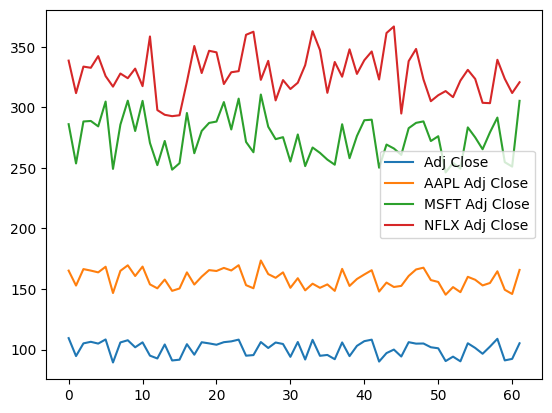

In [55]:
model_df[['Adj Close', 'AAPL Adj Close', 'MSFT Adj Close', 'NFLX Adj Close']].plot()

The above plot is all of the adjusted closes for each of the stocks, and illustrates that there is a correlation between the stocks and therefore we can use the data for the other stocks to have an impact on our model accuracy

In [56]:
import mplfinance

In [57]:
import matplotlib.pyplot as plt

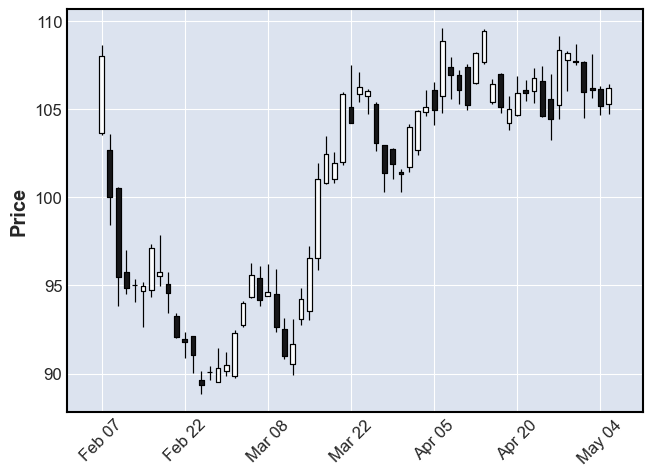

In [58]:
import matplotlib.dates as dates
o_df = model_df[['Date', 'Open', 'Close', 'High', 'Low']]
pd.to_datetime(o_df['Date'])
o_df.index = pd.DatetimeIndex(o_df['Date'])
mplfinance.plot(o_df.sort_index(), type='candle')

The above plot is used to illustrate the candlestick notation for Google stock and gives us overall information on how the open, high, low, volume are all influential upon the adjusted close of the stock.

<AxesSubplot:>

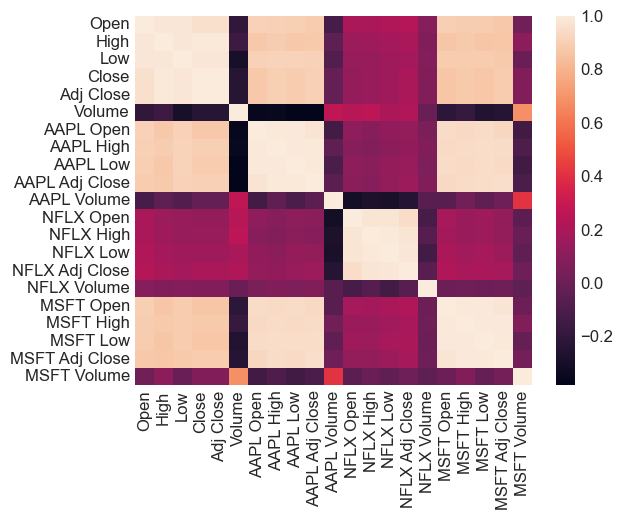

In [59]:
sns.heatmap(model_df.corr())

The above plot illustrates that there is a relatively strong correlation between the other companes Open, High, Low, Close, Adj Close and Googles. Therefore we can use this information in our model, to have other market factors influence our expected adjusted close price.

# Part 6

For the models below I will be using the RMSE metric inorder to determine the effectiveness of each model.

# Part 7

### 7.1 Picking an Algorithm

Long Short-Term Memory (LSTM) is a type of recurrent neural network (RNN) designed to address the vanishing gradient problem and better capture long-term dependencies in sequential data. LSTM works by incorporating a memory cell, which allows it to store and retrieve information over extended time intervals. The LSTM cell has three essential components: an input gate, a forget gate, and an output gate. The input gate controls which information to update in the memory cell, while the forget gate determines which information to discard from the cell. The output gate regulates which information to output from the memory cell to produce the final prediction. This architecture enables LSTMs to learn and retain information over extended periods, making them highly effective for tasks like natural language processing, time series analysis, and various other sequential data tasks.

### 7.2 Model Training

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [61]:
model = Sequential()

In [62]:
from sklearn.preprocessing import MinMaxScaler

In [63]:
scaler = MinMaxScaler(feature_range=(0, 1)).fit(X)

In [64]:
X_train = scaler.transform(X_train)

In [65]:
X_val = scaler.transform(X_val)

In [66]:
X_test = scaler.transform(X_test)

In [67]:
# have to reshape the data below for the LSTM model, expects three dimensional object

In [68]:
trainX = np.array(X_train)

In [69]:
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])

In [70]:
testX =np.array(X_test)

In [71]:
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [72]:
valX = np.array(X_val)

In [73]:
X_val = valX.reshape(X_val.shape[0], 1, X_val.shape[1])

In [74]:
model.add(LSTM(64, return_sequences=True, input_shape=(None, X_train.shape[2])))

In [75]:
model.add(LSTM(128, return_sequences=True))

In [76]:
model.add(LSTM(64, return_sequences=True))

In [77]:
model.add(Dense(1))

In [78]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [79]:
history = model.fit(X_train, y_train, epochs=1000, batch_size = 10, validation_data = (X_val, y_val))

Epoch 1/1000
5/5 [==============================] - 13s 588ms/step - loss: 10137.4150 - val_loss: 10709.0938
Epoch 2/1000
5/5 [==============================] - 0s 25ms/step - loss: 10128.0381 - val_loss: 10695.4189
Epoch 3/1000
5/5 [==============================] - 0s 25ms/step - loss: 10112.1660 - val_loss: 10670.5029
Epoch 4/1000
5/5 [==============================] - 0s 23ms/step - loss: 10082.8350 - val_loss: 10623.1455
Epoch 5/1000
5/5 [==============================] - 0s 24ms/step - loss: 10028.9033 - val_loss: 10531.3633
Epoch 6/1000
5/5 [==============================] - 0s 24ms/step - loss: 9927.3984 - val_loss: 10358.0811
Epoch 7/1000
5/5 [==============================] - 0s 23ms/step - loss: 9745.0195 - val_loss: 10068.9688
Epoch 8/1000
5/5 [==============================] - 0s 25ms/step - loss: 9468.1973 - val_loss: 9689.3643
Epoch 9/1000
5/5 [==============================] - 0s 22ms/step - loss: 9101.7529 - val_loss: 9306.7412
Epoch 10/1000
5/5 [======================

Text(0.5, 0, 'Epochs')

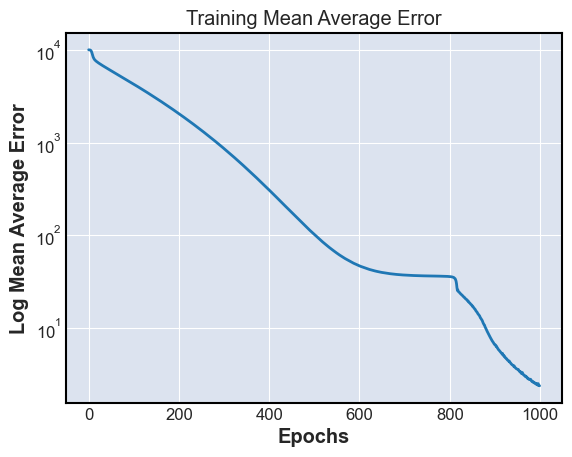

In [80]:
m_hist = pd.DataFrame(history.history)
m_hist['epoch'] = history.epoch
fig, ax = plt.subplots()
num_epochs = m_hist.shape[0]
ax.plot(np.arange(0, num_epochs), m_hist["loss"], 
        label="Training MSE")
ax.set_yscale('log')
ax.set_title('Training Mean Squared Error')
ax.set_ylabel('Log Mean Squared Error')
ax.set_xlabel('Epochs')

Text(0.5, 0, 'Epochs')

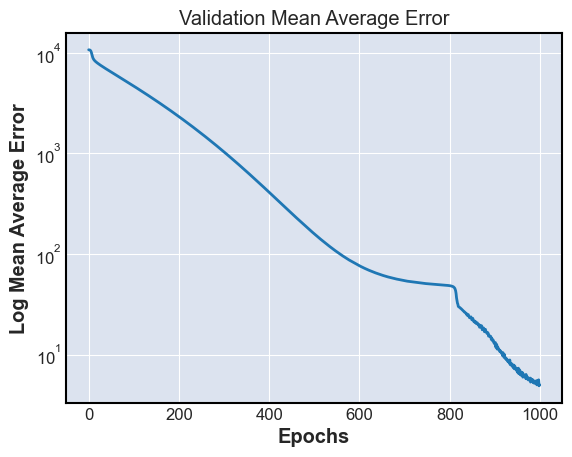

In [81]:
m_hist = pd.DataFrame(history.history)
m_hist['epoch'] = history.epoch
fig, ax = plt.subplots()
num_epochs = m_hist.shape[0]
ax.plot(np.arange(0, num_epochs), m_hist["val_loss"], 
        label="Validation MSE")
ax.set_yscale('log')
ax.set_title('Validation Mean Squared Error')
ax.set_ylabel('Log Mean Squared Error')
ax.set_xlabel('Epochs')

In [82]:
val_pred = model.predict(X_val)

1/1 [==============================] - 2s 2s/step


In [83]:
val_pred = pd.DataFrame(val_pred.reshape(-1,1))

In [84]:
val_pred.columns = ['Close']

In [85]:
validation_concat = pd.concat([val_pred, y_val.reset_index(drop=True)], axis=1)

In [86]:
validation_concat.rename(columns={'0':'Predicted', 'Adj Close':'Actual'}, inplace=True)
validation_concat

,Close,Actual
0,88.957878,89.349998
1,102.982681,108.040001
2,104.724098,105.220001
3,104.454750,106.059998
4,104.945641,106.120003
5,104.906425,105.209999


<AxesSubplot:>

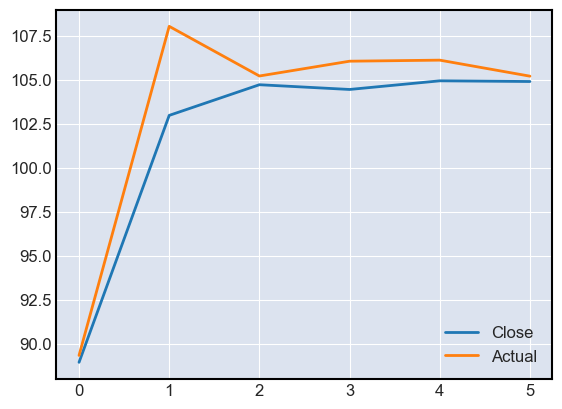

In [87]:
validation_concat.plot()

In [88]:
test_pred = model.predict(X_test)

1/1 [==============================] - 0s 47ms/step


In [89]:
test_pred = pd.DataFrame(test_pred.reshape(-1,1))

In [90]:
test_pred.columns = ['Close']

In [91]:
test_concat = pd.concat([test_pred, y_test.reset_index(drop=True)], axis=1)
test_concat

,Close,Adj Close
0,92.900986,95.459999
1,104.894325,108.370003
2,103.752808,105.839996
3,94.481026,92.660004
4,104.714470,106.120003
5,89.802650,90.300003
6,96.193596,95.000000


<AxesSubplot:>

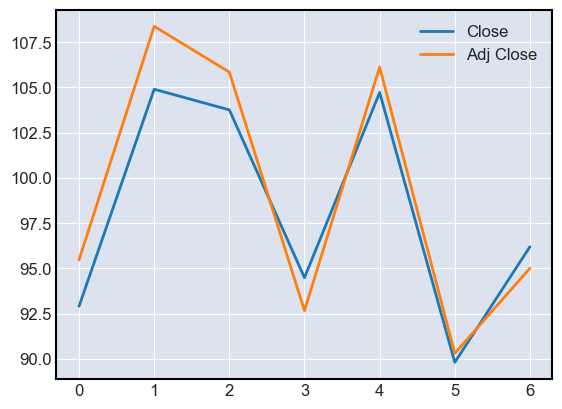

In [92]:
test_concat.plot()

In [93]:
from sklearn.metrics import mean_squared_error

In [94]:
rmse_test = mean_squared_error(test_concat['Adj Close'], test_concat['Close'], squared=False)
rmse_test

2.0684333178996384

Hyperparameters: Epochs=1000, Batch Size = 10, Optimizer=ADAM, LSTM Units=64/128 (Multiple of 32, not too high), Dense=1 forone output

# Part 8

### 8.1 Another Model

The next model I will be using is the Lasso regression model. Lasso regression is a linear regression technique used for feature selection and regularization. It works by adding a penalty term to the traditional linear regression model, which is based on the absolute values of the model coefficients. The Lasso regression penalty encourages the model to shrink less important feature coefficients to zero, effectively performing automatic feature selection by excluding irrelevant predictors from the final model. This helps in avoiding overfitting and enhances model interpretability by identifying the most significant variables contributing to the outcome. Lasso regression strikes a balance between fitting the data well and keeping the model simple, making it a valuable tool in various fields, especially when dealing with high-dimensional datasets and complex models.

### 8.2 Model Training

In [95]:
from sklearn.linear_model import Lasso

In [96]:
model2 = Lasso(alpha = 1.0)

In [97]:
# have to reshape back to 2-D for the Lasso Model

In [107]:
X_train = trainX.reshape(X_train.shape[0], X_train.shape[2])

In [101]:
X_val = valX.reshape(X_val.shape[0], X_val.shape[2])

In [102]:
X_test = testX.reshape(X_test.shape[0], X_test.shape[2])

In [109]:
history2 = model2.fit(X_train, y_train)

In [123]:
val_pred = pd.DataFrame(history2.predict(X_val))
val_pred

,0
0,95.594034
1,102.098893
2,103.845913
3,103.079269
4,103.302294
5,103.274417


In [124]:
val_pred.columns = ['Predicted']

In [127]:
val_df = pd.concat([val_pred, y_val.reset_index(drop=True)], axis = 1)
val_df

,Predicted,Adj Close
0,95.594034,89.349998
1,102.098893,108.040001
2,103.845913,105.220001
3,103.079269,106.059998
4,103.302294,106.120003
5,103.274417,105.209999


<AxesSubplot:>

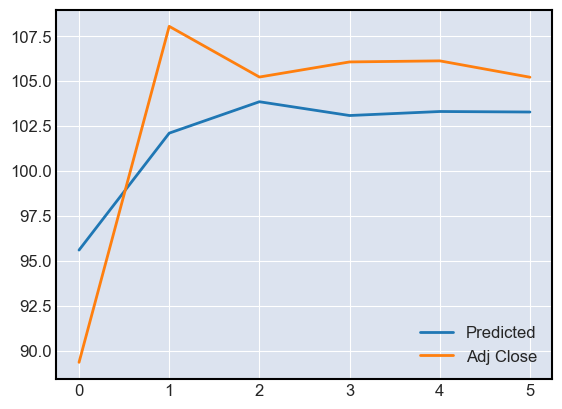

In [128]:
val_df.plot()

In [129]:
test_pred = pd.DataFrame(history2.predict(X_test))
test_pred

,0
0,100.663179
1,102.842308
2,101.332252
3,97.852150
4,103.627535
5,95.552219
6,98.093761


In [130]:
test_pred.columns = ['Predicted']

In [131]:
pred_df = pd.concat([test_pred, y_test.reset_index(drop=True)], axis = 1)
pred_df

,Predicted,Adj Close
0,100.663179,95.459999
1,102.842308,108.370003
2,101.332252,105.839996
3,97.852150,92.660004
4,103.627535,106.120003
5,95.552219,90.300003
6,98.093761,95.000000


<AxesSubplot:>

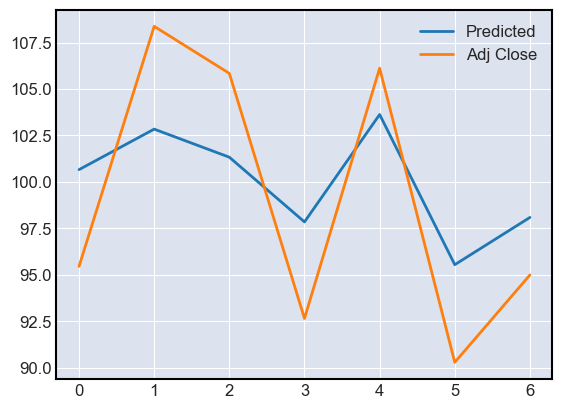

In [132]:
pred_df.plot()

In [134]:
rmse_test = mean_squared_error(pred_df['Adj Close'], pred_df['Predicted'], squared=False)
rmse_test

4.602423987158262

In [171]:
np.mean(Y['Adj Close'])

100.63153248448526

# Part 9

In this project, I aimed to determine the expected Adjusted Close of the GOOG ticker given information on GOOG open, high, low as well as similar information from tickers like MSFT, NFLX, and AAPL. In this, I decided to use a dataset containing information on a GOOG, MSFT, NFLX, AAPL and their Open, Close, Adj Close, High, Low, and Volume over a three month period. Over observing this dataset we found that their is a strong correlation between GOOG features and the features for the other tickers. In determining a model for this, I chose to use a Lasso Regression and a LSTM neural network model. After training the models, I found that the LSTM neural network worked best to predict the Adjusted Close of the GOOG ticker. In order to pick the best model, I used the RMSE as we are along a time-based prediction. When tested I found that the LSTM model gave an accurate price to within 2.07 USD, while the Lasso model gave an accurate prediction to within 4.60 USD. Given that the mean value is 100.63 USD, this gives us an accuracy of right around 2 percent. In the future, I would like to use a larger dataset with more dates.

# Part 12

I think that these decisions have always existed and varied from person to person as the driver must make such a decision. The actual decision one should make has never actually been nailed down so now we need an all-around singular solution to a problem that does not have a correct response. This situation has been of the most famous ethical situation in existence known as the ‘trolly problem’ and philosophy or ethical professionals have not reached a valid solution. Overall, my opinion is that such ethical decisions will be upon the individual driver for as long as possible until the vehicle will ultimately make a decision to benefit the individuals in the vehicle. I think from a company standpoint you are in a lose-lose situation, as you want to promote the safety of the passengers in your own vehicle but will also face public backlash for autonomous control. Now when the vehicle does have to ultimately make the decision, the decision will be pondered upon resulting in policymakers having to create some sort of law on autonomous decision. There is bound to be some sort of lawsuit eventually and then some sort of official law. The development of this software is bound to be complicated in decision making for a variety of situations before it is fully released. The sheer data that is currently being collected will ultimately end up likely providing the most optimal situation for both the public good and the customer/individual good. An interesting idea at the current standpoint is many of the autonomous vehicle companies are private and do not have to face or deal with public issues at that point and they will likely prioritize their own well-being. So as development continues, I am sure there are better educated individuals who have a stronger ethical background who weigh all of these options and make some sort of educated decision. Ultimately, there will likely never be a universally accepted solution for this issue, and I think automotive designers will try to push off these issues onto users for as long as possible. 